In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('boston_housing.csv')

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.duplicated().sum() #Duplicated Values are checked

np.int64(0)

In [ ]:
#Split into dependent and independent dataset
x = df.iloc[:,0:13]
y = df.iloc[:,13]

In [ ]:
#split int train and test Data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
print(X_train.shape,X_test.shape)

(404, 13) (102, 13)


In [ ]:
print(y_train.shape,y_test.shape)

(404,) (102,)


In [ ]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[1.51939061e-03, 0.00000000e+00, 2.36436950e-01, ...,
        5.63829787e-01, 9.65883302e-01, 1.12582781e-01],
       [1.66494548e-03, 2.50000000e-01, 1.71187683e-01, ...,
        7.55319149e-01, 9.84315901e-01, 1.41556291e-01],
       [1.88889543e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 1.00000000e+00, 8.02428256e-01],
       ...,
       [6.59293909e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 1.00000000e+00, 4.86754967e-01],
       [3.64314305e-03, 0.00000000e+00, 2.10410557e-01, ...,
        5.10638298e-01, 9.49190579e-01, 2.52483444e-01],
       [8.29719002e-04, 0.00000000e+00, 2.01612903e-01, ...,
        7.02127660e-01, 1.00000000e+00, 1.94260486e-01]])

In [ ]:
#ANN Building
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

model = Sequential() #object created

model.add(Dense(128,activation='relu' ,input_dim=13)) #layer 1 add with 128 node
model.add(Dense(64,activation='relu'))#layer 2 with 64 node
model.add(Dense(1,activation='linear')) #output layer

model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mae'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2) #Ann trained

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 565.3591 - mae: 22.2017 - val_loss: 523.9057 - val_mae: 20.8763
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 562.5312 - mae: 21.8433 - val_loss: 465.3191 - val_mae: 19.3449
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 469.0315 - mae: 19.7283 - val_loss: 374.1258 - val_mae: 16.7699
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 356.3300 - mae: 16.4882 - val_loss: 258.5997 - val_mae: 12.9607
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 249.0191 - mae: 12.9520 - val_loss: 163.8927 - val_mae: 9.4656
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 144.0421 - mae: 9.6200 - val_loss: 132.8428 - val_mae: 8.5578
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 125.5342 - mae: 8.7926 - val_loss: 127.4472 - val_mae: 8.5340
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 123.2856 - mae: 8.7430 - val_loss: 109.3278 - val_mae: 7.7734
Epoch 9/100
11/11 ━━━━

In [ ]:
y_predict=model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
y_predict

array([[29.989283],
       [25.69291 ],
       [17.394995],
       [21.00856 ],
       [20.000475],
       [20.20565 ],
       [29.593819],
       [18.029078],
       [20.639332],
       [25.597624],
       [27.473297],
       [28.197025],
       [18.284595],
       [22.237844],
       [21.044062],
       [18.43542 ],
       [14.381386],
       [43.20924 ],
       [26.504227],
       [11.945791],
       [19.172134],
       [13.589614],
       [24.256401],
       [24.701511],
       [28.931738],
       [10.863665],
       [12.645046],
       [18.367765],
       [39.550457],
       [14.432524],
       [23.200655],
       [14.45196 ],
       [44.59769 ],
       [17.251987],
       [20.697124],
       [19.19244 ],
       [16.05968 ],
       [29.26204 ],
       [11.371482],
       [19.175367],
       [23.680534],
       [22.35265 ],
       [28.06007 ],
       [14.311532],
       [16.967175],
       [12.375168],
       [42.511806],
       [16.678337],
       [21.000954],
       [14.163437],


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("MSE :-",mean_squared_error(y_test,y_predict))
print("MAE :-",mean_absolute_error(y_test,y_predict))

MSE :- 13.488717024803945
MAE :- 2.7026676364973485


In [ ]:
mse_nn, mae_nn = model.evaluate(X_test_scaled, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.5923 - mae: 2.6683
Mean squared error on test data:  13.488717079162598
Mean absolute error on test data:  2.7026679515838623


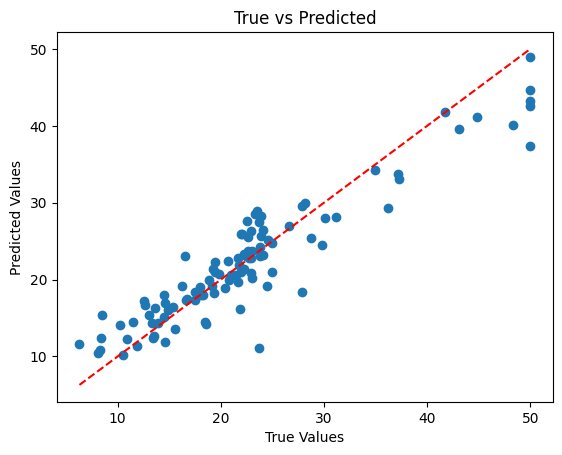

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
